# Random Forest Analysis using Python
This is an analysis from a well-known financial instituation which attempts to classify new customers in to high and low credit risk based on a known number of factors. 

In [16]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('cw.csv')

Display and check data

In [13]:
df.head()

,credit_appl,account_balance,duration_credit_month,payment_status,purpose,credit_amount,value_savings_stocks,length_current_employment,installment_per_cent,Most_valuable_asset_available,age_years,type_of_apartment,num_credits_at_bank
0,1,1,4,0,3,1494,2,0,1,1,33,2,1
1,1,1,4,0,0,1494,2,0,1,1,29,2,1
2,1,1,4,1,0,1544,0,1,2,1,42,2,2
3,1,1,4,1,0,3380,0,1,1,1,37,2,1
4,1,0,6,0,0,343,0,0,4,1,27,2,1


In [30]:
X = df.iloc[:, 1:].values  #this selects the first 5 columns of the dataframe
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [31]:
import warnings; warnings.simplefilter('ignore')
#Feature scaling
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 


In [35]:
#check that the train and test matrices are ok
xs = X_train.shape


In [36]:
xt = X_test.shape

In [39]:
matshape=[xs, xt]

In [40]:
matshape

[(350, 12), (150, 12)]

In [69]:
#import the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=99, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [71]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 

[[22 27]
 [ 4 97]]
              precision    recall  f1-score   support

           0       0.85      0.45      0.59        49
           1       0.78      0.96      0.86       101

   micro avg       0.79      0.79      0.79       150
   macro avg       0.81      0.70      0.72       150
weighted avg       0.80      0.79      0.77       150

0.7933333333333333


                               importance
credit_amount                    0.229902
age_years                        0.153433
duration_credit_month            0.131416
account_balance                  0.086407
Most_valuable_asset_available    0.070711
payment_status                   0.064770
installment_per_cent             0.061293
length_current_employment        0.050217
value_savings_stocks             0.050147
purpose                          0.042979
type_of_apartment                0.033917
num_credits_at_bank              0.024808


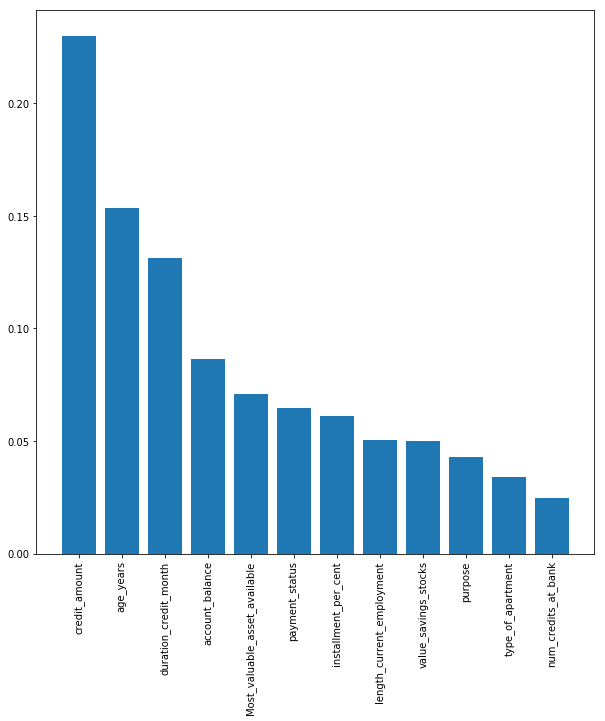

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
dfx = df[df.columns[1:13]]
feature_importances = pd.DataFrame(regressor.feature_importances_,index = dfx.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

#plot of the feature importances
fig = plt.figure(figsize=(10, 10))
plt.bar(feature_importances.index, feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()

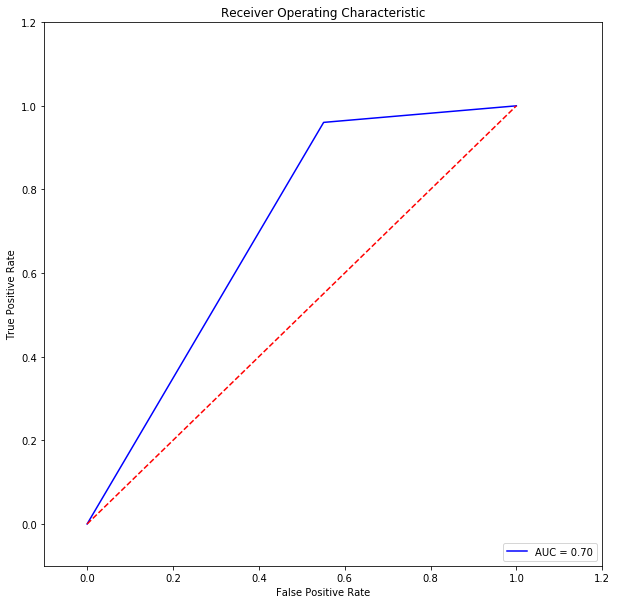

In [123]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


#model = DecisionTreeClassifier()
#model.fit(X_train, y_train)
#predictions = tree.predict_proba(X_test)

#print roc_auc_score(y_test, predict_proba[:,1])

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [74]:
print(y_pred)

[1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1]


In [116]:
print(y_test)

[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1
 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 1]
